In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [ ]:
# 데이터 로드
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data = data['#Passengers']
  # 승객 수 데이터를 로드하고, 날짜를 인덱스로 설정

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# 데이터 나누기
train = data[:'1959']  # 1959년까지의 데이터를 사용하여 모델이 과거의 패턴을 학습
test = data['1960':] # 학습된 모델이 1960년 이후의 데이터를 얼마나 잘 예측하는지 평가

In [ ]:
train.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
test.head()

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472


**1. ARIMA**<br>
 비계절성 시계열 데이터 분석에 적합한 방법론.
<br>'AirPassengers' 데이터셋을 사용하여 항공 승객 수의 변동 예측

In [ ]:
# ARIMA 모델 학습
model = ARIMA(train, order=(5,1,2))  # AR 항 5개, 차분 1회, MA 항 2개
model_fit = model.fit()

# AR(Autoregressive): 과거 값들이 현재 값을 설명하는데 사용
# I(Integrated): 차분 데이터를 안정화하기 위해 사용합
# MA(Moving Average): 과거 예측 오차를 사용하여 현재 값을 설명.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# 예측
predictions = model_fit.forecast(steps=len(test))

In [ ]:
# 모델 평가
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')  # 7842.463397690625   .... 88



Mean Squared Error: 7842.463397690625


In [ ]:
import math
math.sqrt(mse)

88.55768401268534

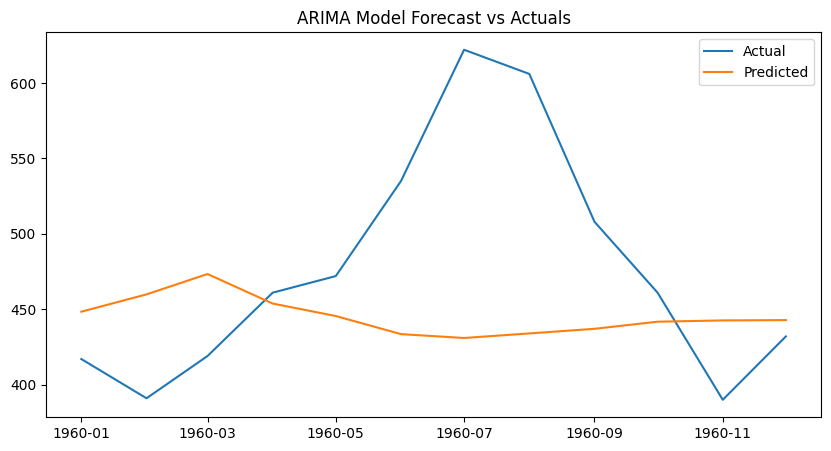

In [ ]:
# 시각화
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend()
plt.show()


**cf) 5.0.SeqData.Anal.AutoArima.ipynb**

**RNN**<br>
시계열 데이터 처리에 유용한 신경망 구조 <br>
데이터의 시간적 순서 정보를 유지하면서 학습

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [ ]:
# 데이터 로드 및 스케일링
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')
scaler = MinMaxScaler()   # MinMaxScaler 객체를 생성, 0과 1 사이의 값으로 변환
data_scaled = scaler.fit_transform(data)  # 데이터 스케일링



In [ ]:
# 데이터 분할
# 시계열 데이터를 입력 및 타겟 데이터로 변환
def create_dataset(data, look_back=1):  # look_back : 과거 몇 개의 데이터를 기반으로 다음 값을 예측할지 결정 -> 시퀀스 생성
    X, Y = [], []  # X : 입력데이터 저장, Y : 입력에 대한 타겟(정답) 데이터 저장, X에 해당하는 시퀀스 다음에 오는 단일 데이터 포인트
    for i in range(len(data)-look_back): # len(data)-look_back 만큼 반복문 실행 <- look_back 값을 사용하여 데이터의 끝까지 루프
        X.append(data[i:(i+look_back), 0])  # 현재 인덱스 i에서 시작하여 i+look_back까지의 데이터를 X 리스트에 추가
        Y.append(data[i + look_back, 0])    # i + look_back 위치의 데이터 (즉, X의 마지막 데이터 다음 시점의 데이터)를 Y 리스트에 추가
    return np.array(X), np.array(Y)  # X와 Y를 NumPy 배열로 변환하여 반환


In [ ]:
# look_back = 1    과거 몇 개의 데이터를 기반으로 다음 값을 예측할지 결정

X, Y = create_dataset(data_scaled)
train_size = int(len(X) * 0.67)  # 전체 데이터의 67%를 학습용 데이터로 설정
test_size = len(X) - train_size  #  33%를 테스트용 데이터로 설정

X_train, X_test = X[0:train_size], X[train_size:len(X)]  # X 데이터의 처음부터 train_size까지의 데이터를 학습용 데이터로 설정
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

In [ ]:
print(X[:5])


[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]]


In [ ]:
# RNN 모델 구축
# SimpleRNN 층을 사용한 간단한 RNN 모델 구축
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))  # look_back: 입력 시퀀스의 길이(과거 데이터를 몇 개 볼 것인지).
                                                     # 1: 각 타임스텝에서 입력 피처의 수. 여기서는 단일 피처(스칼라 값)를 입력으로 사용
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 4)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)



Epoch 1/50
95/95 - 2s - 23ms/step - loss: 0.0021
Epoch 2/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 3/50
95/95 - 0s - 2ms/step - loss: 0.0020
Epoch 4/50
95/95 - 0s - 2ms/step - loss: 0.0020
Epoch 5/50
95/95 - 0s - 2ms/step - loss: 0.0020
Epoch 6/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 7/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 8/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 9/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 10/50
95/95 - 0s - 2ms/step - loss: 0.0020
Epoch 11/50
95/95 - 0s - 2ms/step - loss: 0.0021
Epoch 12/50
95/95 - 0s - 2ms/step - loss: 0.0020
Epoch 13/50
95/95 - 0s - 3ms/step - loss: 0.0021
Epoch 14/50
95/95 - 0s - 2ms/step - loss: 0.0021
Epoch 15/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 16/50
95/95 - 0s - 2ms/step - loss: 0.0021
Epoch 17/50
95/95 - 0s - 2ms/step - loss: 0.0020
Epoch 18/50
95/95 - 0s - 3ms/step - loss: 0.0021
Epoch 19/50
95/95 - 0s - 3ms/step - loss: 0.0020
Epoch 20/50
95/95 - 0s - 3ms/step - loss: 0.0021
Epoch 21/50
95/95 - 0s - 2ms

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


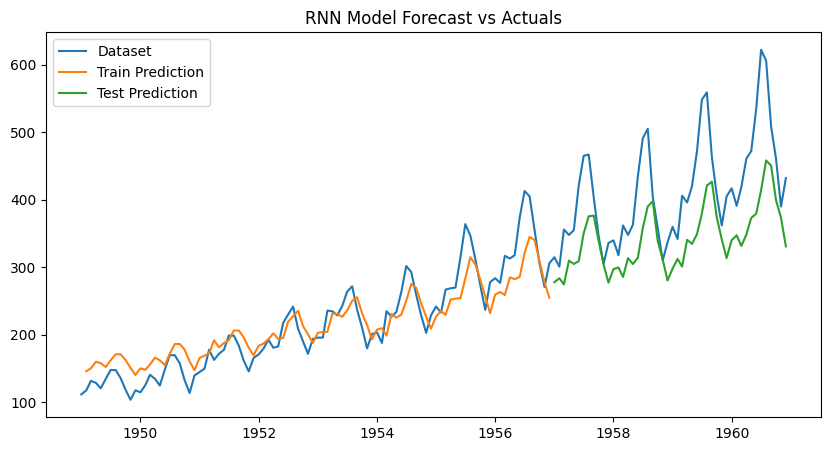

In [ ]:
# 예측 및 시각화
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
test_actual = scaler.inverse_transform([Y_test])

plt.figure(figsize=(10,5))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Dataset')
plt.plot(data.index[look_back:len(train_predict)+look_back], train_predict, label='Train Prediction')
# Adjust the slicing of data.index to match the length of test_predict
plt.plot(data.index[len(train_predict)+look_back:len(data)], test_predict.flatten(), label='Test Prediction')
plt.title('RNN Model Forecast vs Actuals')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
train_mse = mean_squared_error(scaler.inverse_transform([Y_train])[0], train_predict[:,0])
test_mse = mean_squared_error(test_actual[0], test_predict[:,0])
print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')  #  7429.07 .... 86.

Train MSE: 902.77
Test MSE: 7429.07


In [ ]:
math.sqrt(test_mse)

86.19207359936259

**3. LSTM** <br>
RNN 네트워크, 장기 의존성 문제를 해결하기 위해 고안

In [ ]:
from tensorflow.keras.layers import LSTM

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, Y_train, epochs=50, batch_size=1, verbose=2)

# verbose : Keras 모델의 fit 메서드에서 학습 과정 중에 출력되는 로그의 상세도
  # verbose=0: 학습 과정 중에 아무런 출력 없음
  # verbose=1: 학습의 진행 상황을 보여주는 progress bar 출력합니다. 각 에포크(epoch)가 완료될 때마다 업데이ㅌ,.
  # verbose=2: 각 에포크마다 로그 정보 출력. 각 에포크마다 손실 값과 평가 지표가 출력

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


95/95 - 2s - 23ms/step - loss: 0.0251
Epoch 2/50
95/95 - 0s - 2ms/step - loss: 0.0113
Epoch 3/50
95/95 - 0s - 2ms/step - loss: 0.0094
Epoch 4/50
95/95 - 0s - 2ms/step - loss: 0.0085
Epoch 5/50
95/95 - 0s - 3ms/step - loss: 0.0077
Epoch 6/50
95/95 - 0s - 3ms/step - loss: 0.0069
Epoch 7/50
95/95 - 0s - 3ms/step - loss: 0.0060
Epoch 8/50
95/95 - 0s - 3ms/step - loss: 0.0053
Epoch 9/50
95/95 - 0s - 3ms/step - loss: 0.0046
Epoch 10/50
95/95 - 0s - 2ms/step - loss: 0.0041
Epoch 11/50
95/95 - 0s - 3ms/step - loss: 0.0036
Epoch 12/50
95/95 - 0s - 3ms/step - loss: 0.0031
Epoch 13/50
95/95 - 0s - 5ms/step - loss: 0.0028
Epoch 14/50
95/95 - 0s - 3ms/step - loss: 0.0026
Epoch 15/50
95/95 - 1s - 7ms/step - loss: 0.0023
Epoch 16/50
95/95 - 1s - 7ms/step - loss: 0.0022
Epoch 17/50
95/95 - 0s - 5ms/step - loss: 0.0022
Epoch 18/50
95/95 - 1s - 7ms/step - loss: 0.0021
Epoch 19/50
95/95 - 1s - 10ms/step - loss: 0.0021
Epoch 20/50
95/95 - 0s - 3ms/step - loss: 0.0021
Epoch 21/50
95/95 - 0s - 5ms/step - lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


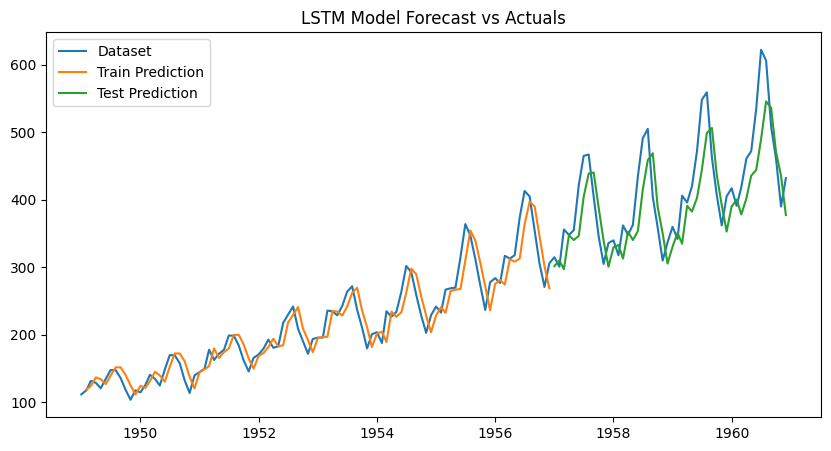

In [ ]:
# LSTM 예측 및 시각화
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
test_actual = scaler.inverse_transform([Y_test])

plt.figure(figsize=(10,5))
plt.plot(data.index, scaler.inverse_transform(data_scaled), label='Dataset')
plt.plot(data.index[look_back:len(train_predict)+look_back], train_predict, label='Train Prediction')

# Calculate the correct start index for test predictions, subtracting 1 to align with the test set
start_index_test = len(train_predict) + (look_back * 2) - 1
# The end index remains the same, ensuring it covers the entire test set
end_index_test = len(data)

# Use the corrected indices to slice data.index
plt.plot(data.index[start_index_test:end_index_test], test_predict.flatten(), label='Test Prediction')
plt.title('LSTM Model Forecast vs Actuals')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
train_mse = mean_squared_error(scaler.inverse_transform([Y_train])[0], train_predict[:,0])
test_mse = mean_squared_error(test_actual[0], test_predict[:,0])
print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')  #  2221.62 .... 41.

Train MSE: 523.63
Test MSE: 2513.74


In [ ]:
math.sqrt(test_mse)

50.13716739236134